# Clean data from a file

In [1]:
# useful if your change your modules after starting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from cleaning import SpikeCleaner, OutOfRangeCleaner, FlatPeriodCleaner
from plotting import plot_timeseries

In [3]:
fn = "./example_data1.csv"
df = pd.read_csv(fn, index_col=0, parse_dates=True, dtype=float)

In [4]:
df.head(10)

,series1
2020-01-01,1.0
2020-01-02,2.0
2020-01-03,-1.0
2020-01-04,4.0
2020-01-05,5.0
2020-01-06,20.0
2020-01-07,7.0
2020-01-08,8.0
2020-01-09,9.0
2020-01-10,10.0


## Try out one cleaner first

In [5]:
cleaner = SpikeCleaner(max_jump=10)

In [6]:
df["clean1"] = cleaner.clean(df.series1)

In [7]:
df.head(10)

,series1,clean1
2020-01-01,1.0,1.0
2020-01-02,2.0,2.0
2020-01-03,-1.0,-1.0
2020-01-04,4.0,4.0
2020-01-05,5.0,5.0
2020-01-06,20.0,NaN
2020-01-07,7.0,7.0
2020-01-08,8.0,8.0
2020-01-09,9.0,9.0
2020-01-10,10.0,10.0


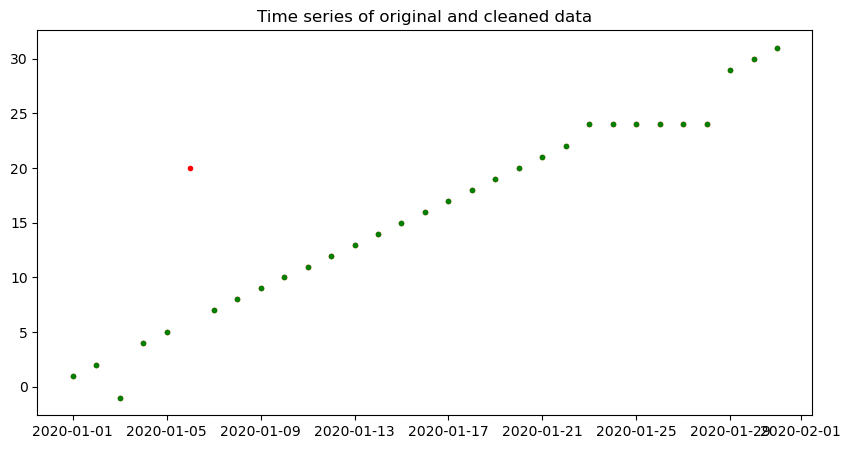

In [8]:
plot_timeseries(df.series1, df.clean1)

## Apply all cleaners

In [9]:
cleaners = [
    SpikeCleaner(max_jump=10),
    OutOfRangeCleaner(min_val=0, max_val=50),
    FlatPeriodCleaner(flat_period=5),
]

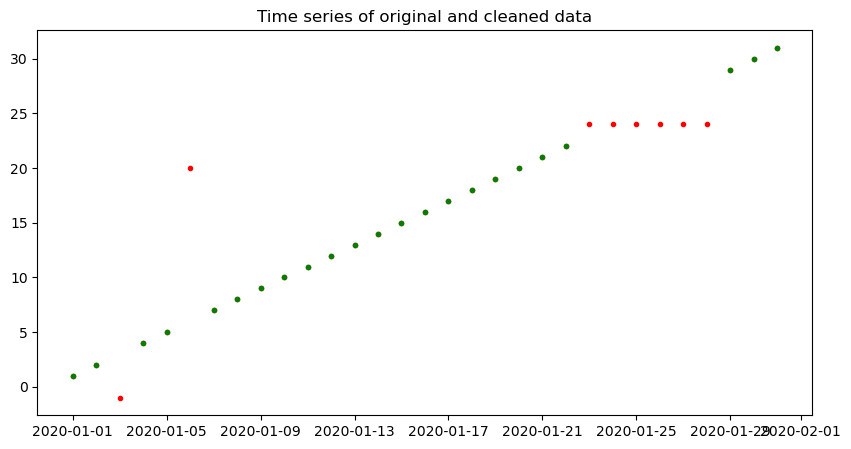

In [10]:
cleaned_data = df.series1.copy()
for cleaner in cleaners:
     cleaned_data = cleaner.clean(cleaned_data)
     # plot_timeseries(df.series1, cleaned_data) # check for each step if something is not working
plot_timeseries(df.series1, cleaned_data)